In [1]:
############# Part B #############

#Q1.1
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Concrete_Data.csv')
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer',
              'CoarseAggregate', 'FineAggregate', 'Age', 'Strength']

# split test and train
train_df = df.drop(df.index[501:631])  
test_df = df.iloc[501:631]

X_cols = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer',
          'CoarseAggregate', 'FineAggregate', 'Age']

X_train = train_df[X_cols]
y_train = train_df['Strength']

X_test = test_df[X_cols]
y_test = test_df['Strength']

# OLS
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_const).fit()

y_pred_train = ols_model.predict(X_train_const)
y_pred_test  = ols_model.predict(X_test_const)

# MSE  R2
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test,  y_pred_test)

print("MSE on Training Data:", mse_train)
print("MSE on Testing Data :", mse_test)
print("R2 on Training Data:", r2_train)
print("R2 on Testing Data :", r2_test)

MSE on Training Data: 104.1544639349233
MSE on Testing Data : 141.25799330049907
R2 on Training Data: 0.6241001089604974
R2 on Testing Data : 0.35125143823505733


In [2]:
#Q2.1
print(ols_model.pvalues)

const               7.081965e-02
Cement              6.970969e-41
Slag                4.145190e-26
FlyAsh              1.894571e-13
Water               1.918418e-03
Superplasticizer    2.461117e-01
CoarseAggregate     5.443241e-03
FineAggregate       2.738122e-03
Age                 9.516219e-74
dtype: float64


In [3]:
#Q2.3
from sklearn.preprocessing import StandardScaler

#StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

ols_model_scaled = sm.OLS(y_train, X_train_scaled_const).fit()

print("P-values after Standardization:")
print(ols_model_scaled.pvalues)

P-values after Standardization:
const               0.000000e+00
Cement              6.970969e-41
Slag                4.145190e-26
FlyAsh              1.894571e-13
Water               1.918418e-03
Superplasticizer    2.461117e-01
CoarseAggregate     5.443241e-03
FineAggregate       2.738122e-03
Age                 9.516219e-74
dtype: float64


In [4]:
#Q2.5
train_df_log = train_df.copy()
test_df_log = test_df.copy()

for col in X_cols:
    train_df_log[col] = np.log(train_df_log[col] + 1)
    test_df_log[col] = np.log(test_df_log[col] + 1)

X_train_log = train_df_log[X_cols]
y_train_log = train_df_log['Strength']
X_test_log = test_df_log[X_cols]
y_test_log = test_df_log['Strength']

X_train_log_const = sm.add_constant(X_train_log)
X_test_log_const = sm.add_constant(X_test_log)

ols_model_log = sm.OLS(y_train_log, X_train_log_const).fit()

print("P-values after Log Transformation:")
print(ols_model_log.pvalues)

P-values after Log Transformation:
const                2.937705e-01
Cement               1.298605e-86
Slag                 4.518790e-36
FlyAsh               2.605347e-01
Water                1.862586e-20
Superplasticizer     1.039697e-05
CoarseAggregate      4.078943e-01
FineAggregate        9.476866e-02
Age                 1.746991e-192
dtype: float64


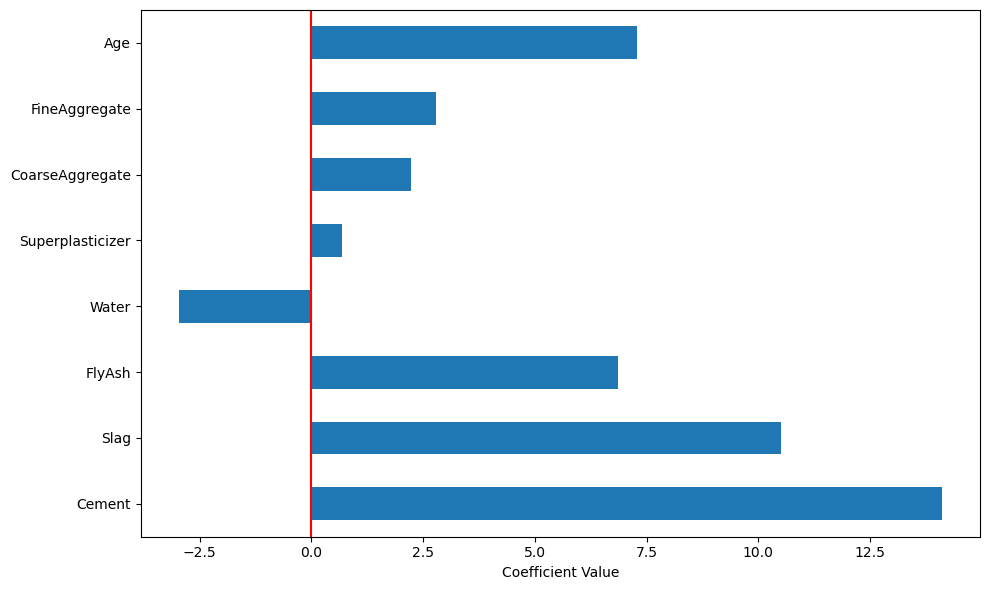

In [5]:
############# Part C #############

#Plot 1
import matplotlib.pyplot as plt

coefs = pd.Series(ols_model_scaled.params[1:], index=X_train_scaled.columns)
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh')
plt.axvline(0, color='red')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()